In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [70]:
data = pd.read_csv('listings_1.csv')
data['host_since'] = pd.to_datetime(data['host_since'], format="%Y-%m-%d")
data['host_timing']=np.ones(len(data))
host_count = data.host_timing.groupby(data.host_since).sum()

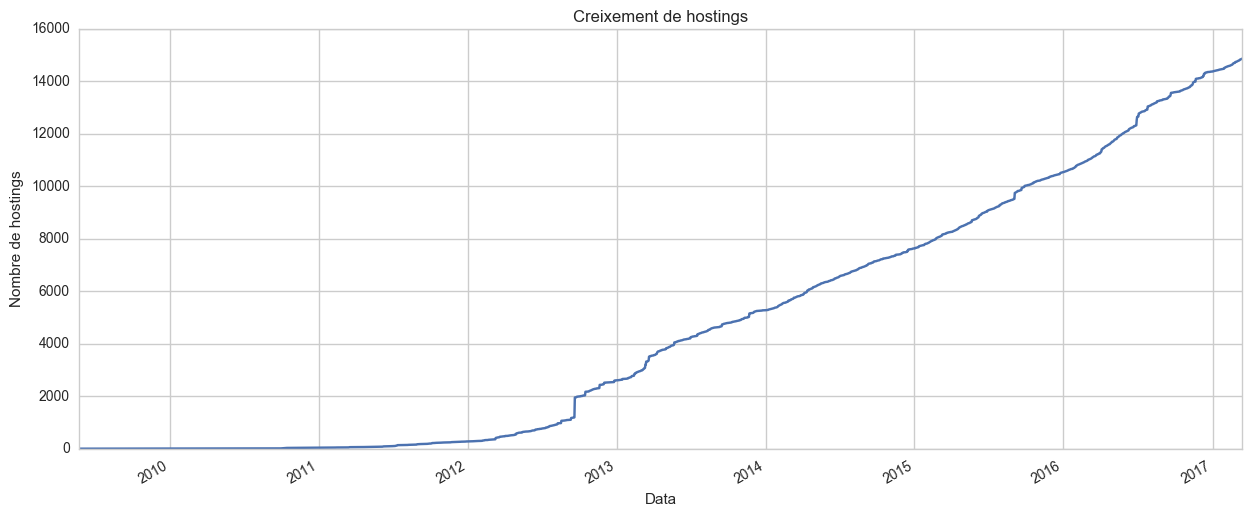

In [75]:
host_grow = host_count.cumsum()
host_grow.plot()
plt.title('Creixement de hostings')
plt.ylabel('Nombre de hostings')
plt.xlabel('Data')

Resamplig a cada mes

In [81]:
grow_res=host_grow.resample('1m').bfill()

In [99]:
grow_res.dropna(inplace=True)

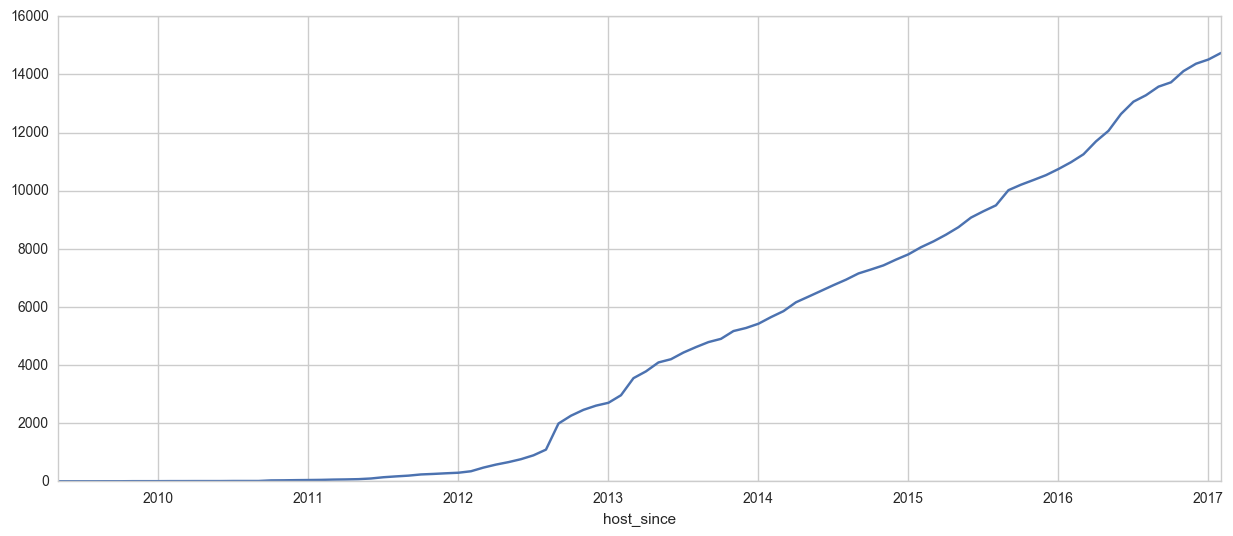

In [100]:
grow_res.plot()

comprovam estacionalitat. Codi de https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [84]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window,center=False).mean()
    rolstd = timeseries.rolling(window=window,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original', linewidth=0.8)
    mean = plt.plot(rolmean, color='red', label='Rolling Mean', linewidth=0.8)
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

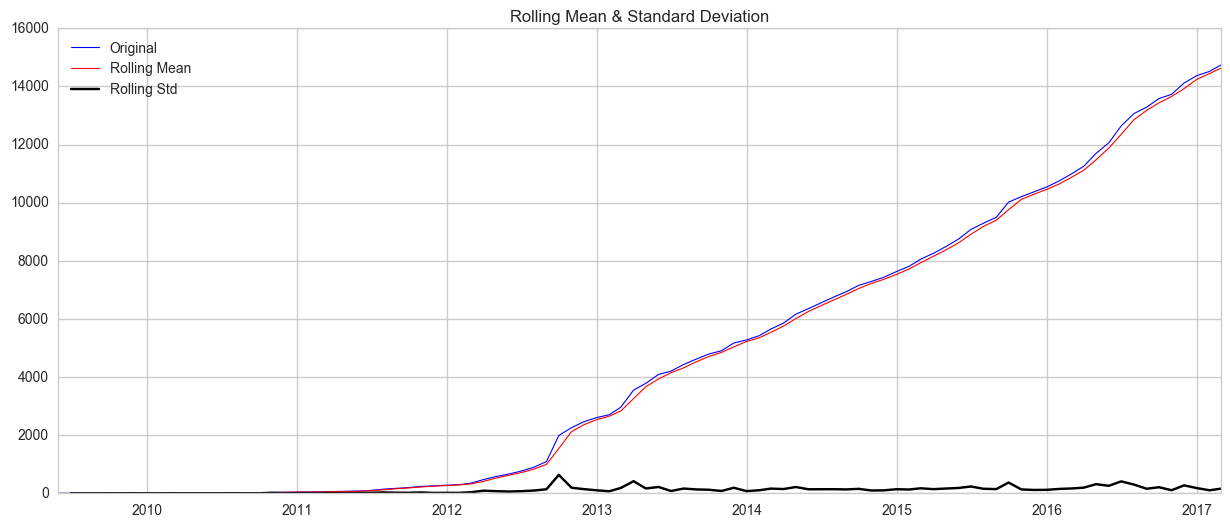

Results of Dickey-Fuller Test:
Test Statistic                  3.390189
p-value                         1.000000
#Lags Used                      1.000000
Number of Observations Used    92.000000
Critical Value (5%)            -2.893508
Critical Value (1%)            -3.503515
Critical Value (10%)           -2.583824
dtype: float64


In [104]:
test_stationarity(grow_res,2)

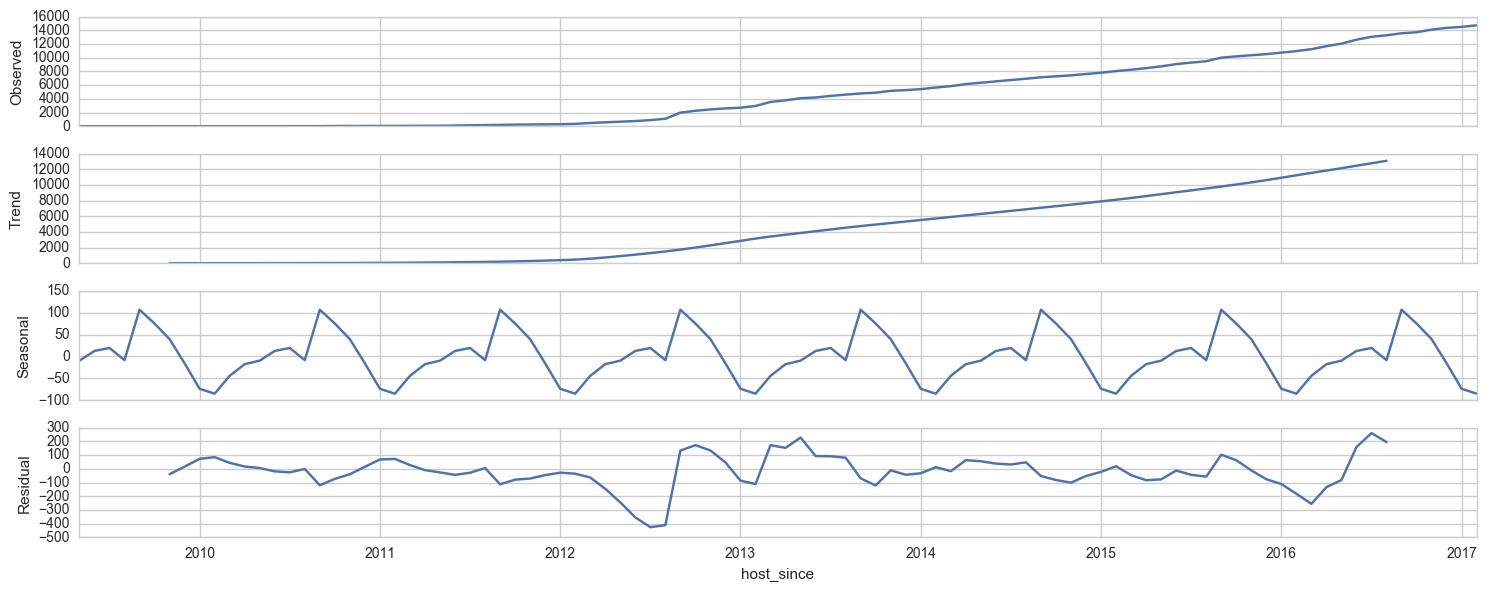

In [105]:
decomposition = seasonal_decompose(grow_res)  
fig = plt.figure()  
fig = decomposition.plot()  